# Installing All Necessary Libraries

In [2]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [3]:
!pip install -qU pandas numpy matplotlib seaborn sklearn
!pip install -qU scikit-learn tensorflow

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


# importing All necessary libraries and pakages

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import log_loss


In [8]:
df = pd.read_csv('/content/user_behavior_dataset.csv')
df.head()

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [9]:
df.columns

Index(['Device Model', 'Operating System', 'App Usage Time (min/day)',
       'Screen On Time (hours/day)', 'Battery Drain (mAh/day)',
       'Number of Apps Installed', 'Data Usage (MB/day)', 'Age', 'Gender',
       'User Behavior Class'],
      dtype='object')

In [10]:
# prompt: check missing values

import pandas as pd
# Assuming df is already defined from previous code
df.isnull().sum()

,0
Device Model,0
Operating System,0
App Usage Time (min/day),0
Screen On Time (hours/day),0
Battery Drain (mAh/day),0
Number of Apps Installed,0
Data Usage (MB/day),0
Age,0
Gender,0
User Behavior Class,0


# Mael Female in Dataset

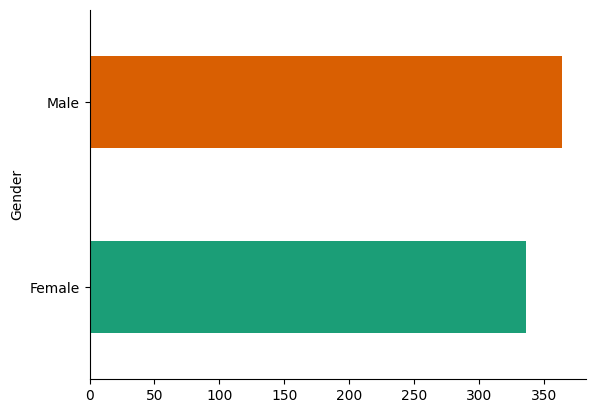

In [14]:
df.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Gender VS App Usage Time plot

<ipython-input-13-ab1d08a4e08b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='App Usage Time (min/day)', y='Gender', inner='box', palette='Dark2')


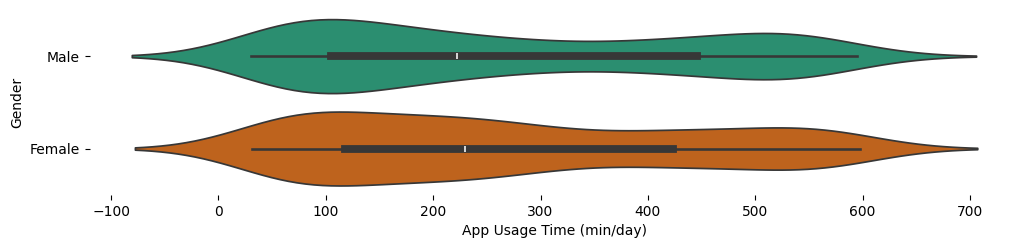

In [13]:
figsize = (12, 1.2 * len(df['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='App Usage Time (min/day)', y='Gender', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# Applying  Deep Learing Models on dataset

# Processing on data preparing for training

In [15]:
# Handle missing values (replace with mean for numerical features, mode for categorical)
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(exclude=np.number).columns

for col in numerical_cols:
    df[col] = df[col].fillna(df[col].mean())

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


# One-hot encode categorical features
# Exclude 'Gender' from one-hot encoding if it's your target variable
categorical_cols_to_encode = [col for col in categorical_cols if col != 'Gender']
df = pd.get_dummies(df, columns=categorical_cols_to_encode, drop_first=True)

# Separate features (X) and target variable (y)
X = df.drop('Gender', axis=1)  # Now 'Gender' should exist for dropping
y = df['Gender']

# Convert target variable to numerical labels if needed
if isinstance(y.iloc[0], str):
    gender_mapping = {'Male': 0, 'Female': 1} # Example mapping
    y = y.map(gender_mapping)


# Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Reshape data for CNN and RNN
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_train_rnn = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_rnn = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Convert labels to categorical (if not already)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)




# Training Of Aritficial Neural Network(ANN) Model
## Model Evaluation

In [18]:
# ANN Model
ann_model = Sequential()
ann_model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
ann_model.add(Dense(64, activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(2, activation='softmax'))  # Output layer with 2 units (Male/Female)
ann_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_ann = ann_model.fit(X_train, y_train, epochs=10, batch_size=24, validation_split=0.2) # Assign the result of fit to history_ann
print("-------------------------------------------")
print("----------------Evaluation of model-----------------------")
print(ann_model.evaluate(X_test, y_test))


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.4989 - loss: 0.7121 - val_accuracy: 0.4375 - val_loss: 0.7109
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5087 - loss: 0.6930 - val_accuracy: 0.4643 - val_loss: 0.7025
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5728 - loss: 0.6804 - val_accuracy: 0.4821 - val_loss: 0.7050
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5803 - loss: 0.6754 - val_accuracy: 0.4821 - val_loss: 0.7073
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6203 - loss: 0.6695 - val_accuracy: 0.4732 - val_loss: 0.7135
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6350 - loss: 0.6651 - val_accuracy: 0.4554 - val_loss: 0.7198
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6431 - loss: 0.6531 - val_accuracy: 0.4643 - val_loss: 0.7253
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6262 - loss: 0.6543 - val_accuracy: 0.4554 - val_loss: 0.7221
E

# Summary of model

In [19]:
print("ANN Model Summary:")
ann_model.summary()

ANN Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,200 (141.41 KB)

 Trainable params: 12,066 (47.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 24,134 (94.28 KB)

# Precision Recall and F1 Of ANN Model

In [29]:
y_pred_ann = ann_model.predict(X_test)
y_pred_ann_classes = np.argmax(y_pred_ann, axis=1) # Convert probabilities to class labels
y_test_classes = np.argmax(y_test, axis=1) # Convert one-hot encoded to class labels

# Calculate metrics for ANN
ann_accuracy = accuracy_score(y_test_classes, y_pred_ann_classes)
ann_precision = precision_score(y_test_classes, y_pred_ann_classes)
ann_recall = recall_score(y_test_classes, y_pred_ann_classes)
ann_f1 = f1_score(y_test_classes, y_pred_ann_classes)

# Print the results for ANN
print("ANN Metrics:")
print(f"Accuracy: {ann_accuracy:.4f}")
print(f"Precision: {ann_precision:.4f}")
print(f"Recall: {ann_recall:.4f}")
print(f"F1-score: {ann_f1:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
ANN Metrics:
Accuracy: 0.5643
Precision: 0.5362
Recall: 0.5606
F1-score: 0.5481


# ANN visualization

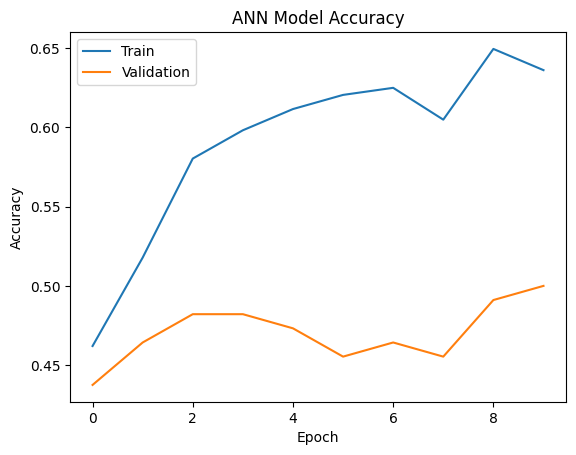

In [20]:
plt.plot(history_ann.history['accuracy'])
plt.plot(history_ann.history['val_accuracy'])
plt.title('ANN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Training of Convolutional Neural Netwok(CNN)
## Model Evaluation

In [21]:
# CNN Model
cnn_model = Sequential()
cnn_model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1],1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(2, activation='softmax'))
cnn_model.compile(optimizer='Adagrad', loss='categorical_crossentropy', metrics=['accuracy'])
history_cnn = cnn_model.fit(X_train_cnn, y_train, epochs=12, batch_size=24, validation_split=0.2) # Assign result to history_cnn
print("-------------------------------------------------------------------")
print("----------------Evaluation of model-----------------------")
print(cnn_model.evaluate(X_test_cnn, y_test))

Epoch 1/12


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5366 - loss: 0.6960 - val_accuracy: 0.5357 - val_loss: 0.6991
Epoch 2/12
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5231 - loss: 0.6954 - val_accuracy: 0.5446 - val_loss: 0.6985
Epoch 3/12
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5337 - loss: 0.6987 - val_accuracy: 0.5357 - val_loss: 0.6981
Epoch 4/12
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5012 - loss: 0.7010 - val_accuracy: 0.5357 - val_loss: 0.6976
Epoch 5/12
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4951 - loss: 0.6970 - val_accuracy: 0.5446 - val_loss: 0.6974
Epoch 6/12
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5025 - loss: 0.6970 - val_accuracy: 0.5536 - val_loss: 0.6972
Epoch 7/12
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5318 - loss: 0.6919 - val_accuracy: 0.5446 - val_loss: 0.6970
Epoch 8/12
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5206 - loss: 0.6971 - val_accuracy: 0.5446 - val_loss: 0.6969
Ep

# Summary of CNN Model

In [23]:
# model summary
print("CNN Model Summary:")
cnn_model.summary()

CNN Model Summary:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 10, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 5, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 160)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 2)                   │             322 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 902 (3.53 KB)

 Trainable params: 450 (1.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 452 (1.77 KB)

# Precision Recall and F1 of CNN

In [30]:
# --- CNN ---
y_pred_cnn = cnn_model.predict(X_test_cnn)
y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1)

cnn_accuracy = accuracy_score(y_test_classes, y_pred_cnn_classes)
cnn_precision = precision_score(y_test_classes, y_pred_cnn_classes)
cnn_recall = recall_score(y_test_classes, y_pred_cnn_classes)
cnn_f1 = f1_score(y_test_classes, y_pred_cnn_classes)

print("\nCNN Metrics:")
print(f"Accuracy: {cnn_accuracy:.4f}")
print(f"Precision: {cnn_precision:.4f}")
print(f"Recall: {cnn_recall:.4f}")
print(f"F1-score: {cnn_f1:.4f}")



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

CNN Metrics:
Accuracy: 0.5000
Precision: 0.4231
Recall: 0.1667
F1-score: 0.2391


# Visualization of CNN Model

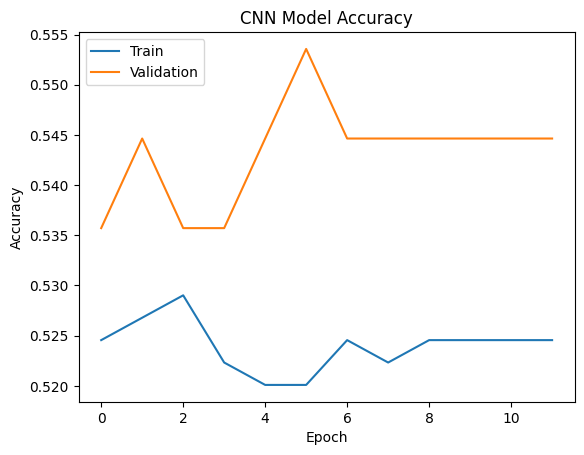

In [24]:
# Plotting CNN training history
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Trainig of Recurrent Neural Network (RNN)LSTM
# Model Evaluation

In [25]:
# RNN Model (LSTM)
rnn_model = Sequential()
rnn_model.add(LSTM(32, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
rnn_model.add(Dense(2, activation='softmax'))
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_rnn=rnn_model.fit(X_train_rnn, y_train, epochs=11, batch_size=32, validation_split=0.2)

print("-------------------------------------------------------------------")
print("----------------Evaluation of model-----------------------")

print(rnn_model.evaluate(X_test_rnn, y_test))

Epoch 1/11


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.4979 - loss: 0.6947 - val_accuracy: 0.5357 - val_loss: 0.6953
Epoch 2/11
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5578 - loss: 0.6914 - val_accuracy: 0.5446 - val_loss: 0.6932
Epoch 3/11
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5445 - loss: 0.6883 - val_accuracy: 0.5179 - val_loss: 0.6931
Epoch 4/11
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5523 - loss: 0.6918 - val_accuracy: 0.5179 - val_loss: 0.6921
Epoch 5/11
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5345 - loss: 0.6866 - val_accuracy: 0.5357 - val_loss: 0.6924
Epoch 6/11
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5847 - loss: 0.6829 - val_accuracy: 0.5179 - val_loss: 0.6928
Epoch 7/11
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5457 - loss: 0.6851 - val_accuracy: 0.5089 - val_loss: 0.6934
Epoch 8/11
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5339 - loss: 0.6827 - val_accuracy: 0.5179 - val_loss: 0.6937
E

# Summary of RNN Model

In [27]:
# model summary
print("RNN Model Summary:")
rnn_model.summary()

RNN Model Summary:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 32)                  │           5,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,480 (68.29 KB)

 Trainable params: 5,826 (22.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,654 (45.53 KB)

# Accuracy precision Recall F1 of RNN Model

In [31]:
# --- RNN ---
y_pred_rnn = rnn_model.predict(X_test_rnn)
y_pred_rnn_classes = np.argmax(y_pred_rnn, axis=1)

rnn_accuracy = accuracy_score(y_test_classes, y_pred_rnn_classes)
rnn_precision = precision_score(y_test_classes, y_pred_rnn_classes)
rnn_recall = recall_score(y_test_classes, y_pred_rnn_classes)
rnn_f1 = f1_score(y_test_classes, y_pred_rnn_classes)

print("\nRNN Metrics:")
print(f"Accuracy: {rnn_accuracy:.4f}")
print(f"Precision: {rnn_precision:.4f}")
print(f"Recall: {rnn_recall:.4f}")
print(f"F1-score: {rnn_f1:.4f}")

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step

RNN Metrics:
Accuracy: 0.4786
Precision: 0.4146
Recall: 0.2576
F1-score: 0.3178


# Visualization of RNN Model

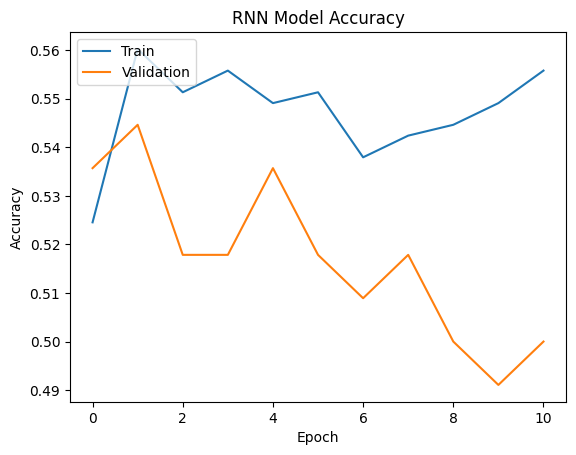

In [28]:
# Plotting RNN training history
plt.plot(history_rnn.history['accuracy'])
plt.plot(history_rnn.history['val_accuracy'])
plt.title('RNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Confusion Matrix of ANN , CNN and RNN

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


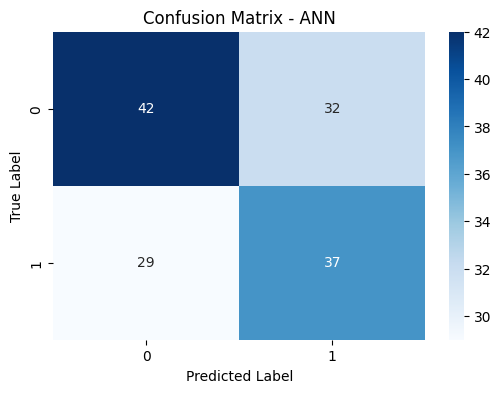

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


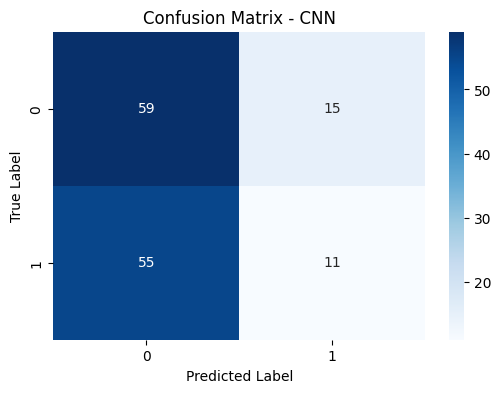

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


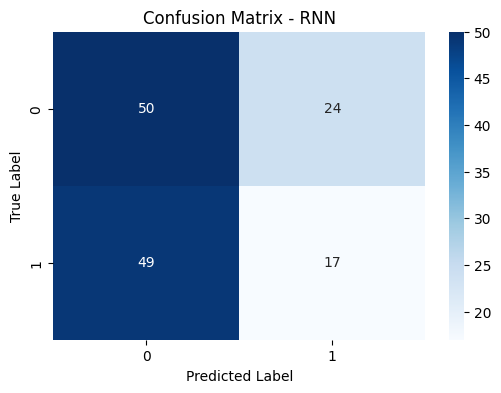

In [34]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder to your training labels and transform both train and test labels
y_train_encoded = label_encoder.fit_transform(np.argmax(y_train, axis=1))  # Assuming y_train is the original target labels
y_test_encoded = label_encoder.transform(np.argmax(y_test, axis=1))       # Assuming y_test is the original target labels
# Function to generate and visualize confusion matrix
def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred_prob = model.predict(X_test)  # Get predicted probabilities
    y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Generate confusion matrices for deep learning models
plot_confusion_matrix(ann_model, X_test, y_test_encoded, "ANN")
plot_confusion_matrix(cnn_model, X_test_cnn, y_test_encoded, "CNN")
plot_confusion_matrix(rnn_model, X_test_rnn, y_test_encoded, "RNN")

# Accuracy, precision,F1 and Recall combined graph of ANN , CNN And RNN

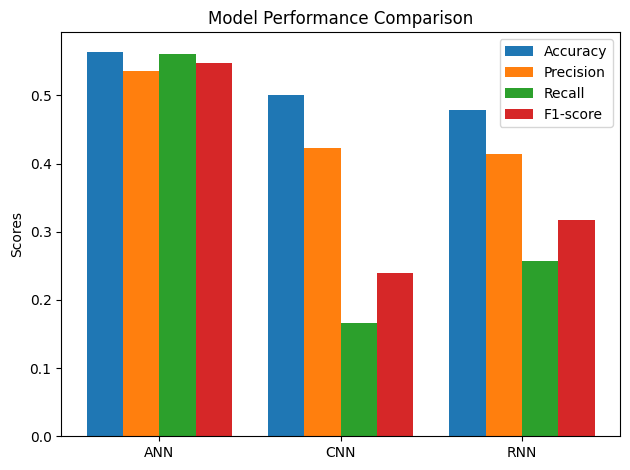

In [35]:
# Store the metrics in lists
models = ['ANN', 'CNN', 'RNN']
accuracy = [ann_accuracy, cnn_accuracy, rnn_accuracy]
precision = [ann_precision, cnn_precision, rnn_precision]
recall = [ann_recall, cnn_recall, rnn_recall]
f1_score = [ann_f1, cnn_f1, rnn_f1]

# Create the plot
x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width*1.5, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - width/2, precision, width, label='Precision')
rects3 = ax.bar(x + width/2, recall, width, label='Recall')
rects4 = ax.bar(x + width*1.5, f1_score, width, label='F1-score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()

plt.show()

# Machine Learning Models

# All Machine Learning Models Results on given dataset

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/user_behavior_dataset.csv')

# Handle missing values (replace with mean for numerical, mode for categorical)
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(exclude=np.number).columns

for col in numerical_cols:
    df[col] = df[col].fillna(df[col].mean())

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Separate features (X) and target variable (y)
X = df.drop('Gender', axis=1)
y = df['Gender']

# Identify and one-hot encode categorical columns in X
categorical_cols_X = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols_X, drop_first=True)

# Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of classifiers
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    SVC(),
    KNeighborsClassifier()
]

# Iterate through classifiers and evaluate their performance
results = {}  # Create a dictionary to store results

for classifier in classifiers:
    # Train the classifier
    classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = classifier.predict(X_test)

    # Calculate and store metrics in the dictionary
    results[classifier.__class__.__name__] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1': f1_score(y_test, y_pred, average='weighted')
    }
    # Print the results using the calculated accuracy for the current classifier
    print(f"Classifier: {classifier.__class__.__name__}")
    print(f"Accuracy: {results[classifier.__class__.__name__]['accuracy']:.4f}") # Access accuracy from results
    print(f"Precision: {results[classifier.__class__.__name__]['precision']:.4f}") # Access precision from results
    print(f"Recall: {results[classifier.__class__.__name__]['recall']:.4f}") # Access recall from results
    print(f"F1-score: {results[classifier.__class__.__name__]['f1']:.4f}") # Access f1-score from results
    print("-" * 20)




Classifier: LogisticRegression
Accuracy: 0.5143
Precision: 0.5127
Recall: 0.5143
F1-score: 0.5131
--------------------
Classifier: DecisionTreeClassifier
Accuracy: 0.4786
Precision: 0.4742
Recall: 0.4786
F1-score: 0.4744
--------------------
Classifier: RandomForestClassifier
Accuracy: 0.5000
Precision: 0.4992
Recall: 0.5000
F1-score: 0.4995
--------------------
Classifier: GradientBoostingClassifier
Accuracy: 0.5143
Precision: 0.5143
Recall: 0.5143
F1-score: 0.5143
--------------------
Classifier: SVC
Accuracy: 0.4500
Precision: 0.4485
Recall: 0.4500
F1-score: 0.4491
--------------------
Classifier: KNeighborsClassifier
Accuracy: 0.5143
Precision: 0.5168
Recall: 0.5143
F1-score: 0.5146
--------------------


# Confusion Matrix of All ML Models

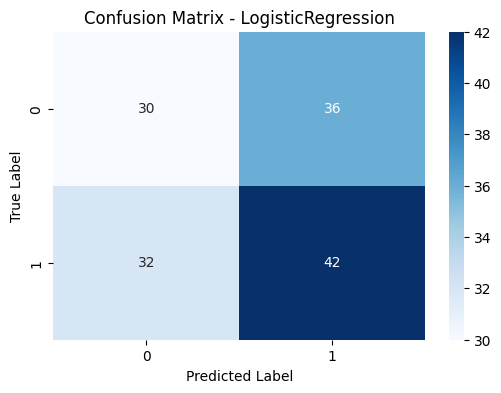

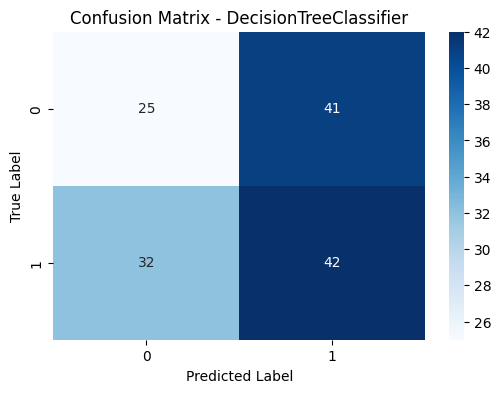

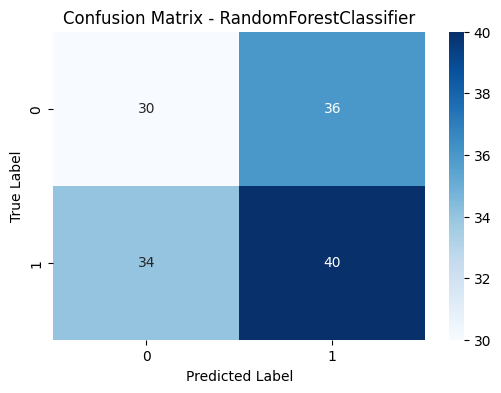

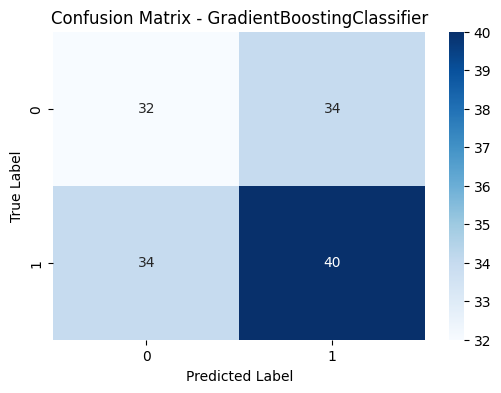

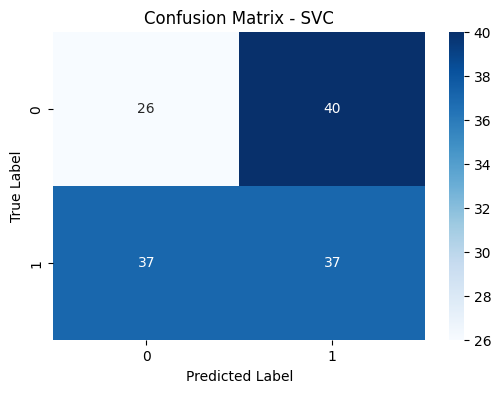

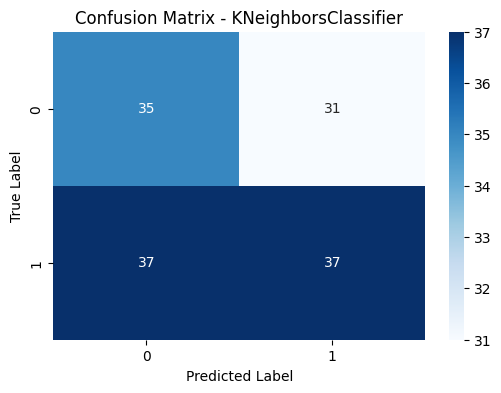

In [39]:
from sklearn.metrics import confusion_matrix

# Iterate through your trained classifiers
for classifier in classifiers:
    model_name = classifier.__class__.__name__  # Get model name
    y_pred = classifier.predict(X_test)  # Get predictions on the test data

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Visualize the confusion matrix using seaborn
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

#Accuracy, precision, Recall and F1 socore of All Machine Learning algorithms and Graphical visualization

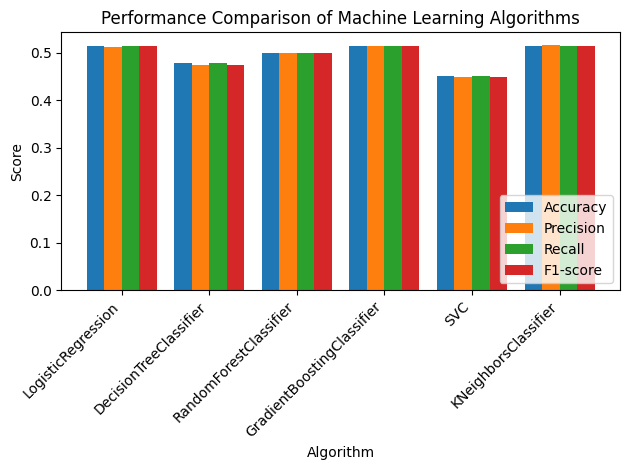

In [40]:
# --- Plotting the results ---

# Create lists of algorithm names and their corresponding metrics
algorithms = list(results.keys())  # Get algorithm names from dictionary keys
accuracy = [results[algo]['accuracy'] for algo in algorithms]
precision = [results[algo]['precision'] for algo in algorithms]
recall = [results[algo]['recall'] for algo in algorithms]
f1 = [results[algo]['f1'] for algo in algorithms]

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
x_pos = np.arange(len(algorithms))

# Create the bar plots
plt.bar(x_pos, accuracy, width=bar_width, label='Accuracy')
plt.bar(x_pos + bar_width, precision, width=bar_width, label='Precision')
plt.bar(x_pos + 2 * bar_width, recall, width=bar_width, label='Recall')
plt.bar(x_pos + 3 * bar_width, f1, width=bar_width, label='F1-score')

# Set the x-axis labels and title
plt.xticks(x_pos + 1.5 * bar_width, algorithms, rotation=45, ha='right')
plt.title('Performance Comparison of Machine Learning Algorithms')
plt.ylabel('Score')
plt.xlabel('Algorithm')
plt.legend(loc='lower right')

# Adjust layout to prevent labels from being cut off
plt.tight_layout()

# Show the plot
plt.show()

# Combined Results Of Machine Learning AND Deep Learning Models

# performance parameters Accuracy, precision, Recall, F1 of both ML and DL Modes

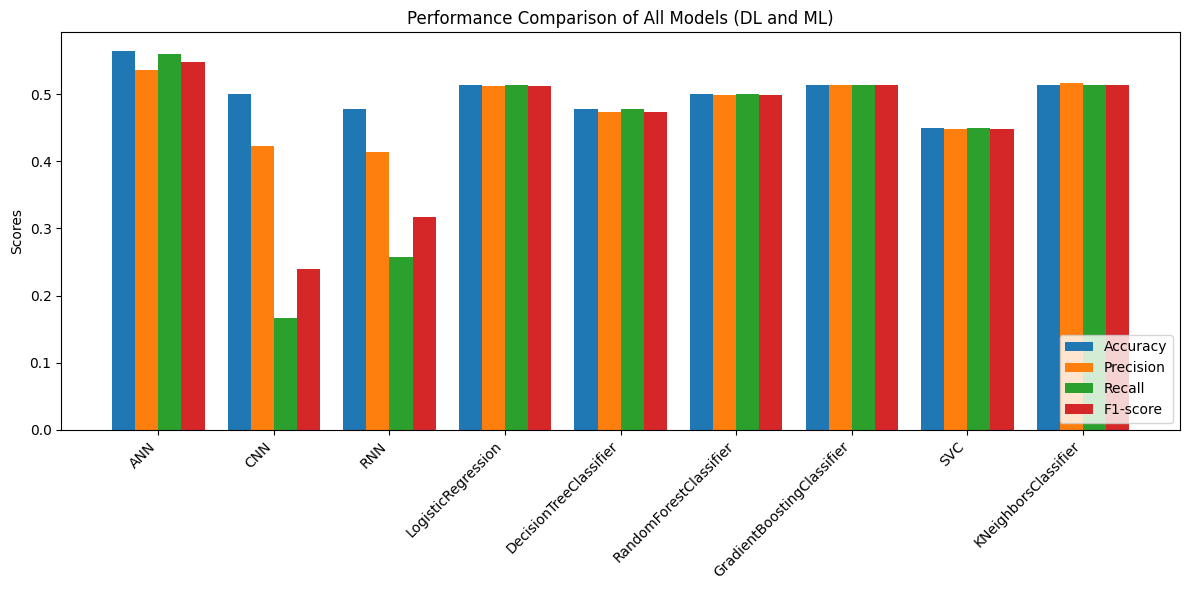

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# --- Deep Learning Metrics ---
dl_models = ['ANN', 'CNN', 'RNN']
dl_accuracy = [ann_accuracy, cnn_accuracy, rnn_accuracy]
dl_precision = [ann_precision, cnn_precision, rnn_precision]
dl_recall = [ann_recall, cnn_recall, rnn_recall]
dl_f1_score = [ann_f1, cnn_f1, rnn_f1]

# --- Machine Learning Metrics ---
ml_algorithms = list(results.keys())  # Get algorithm names from dictionary keys
ml_accuracy = [results[algo]['accuracy'] for algo in ml_algorithms]
ml_precision = [results[algo]['precision'] for algo in ml_algorithms]
ml_recall = [results[algo]['recall'] for algo in ml_algorithms]
ml_f1 = [results[algo]['f1'] for algo in ml_algorithms]


# --- Combine DL and ML data ---
all_models = dl_models + ml_algorithms
all_accuracy = dl_accuracy + ml_accuracy
all_precision = dl_precision + ml_precision
all_recall = dl_recall + ml_recall
all_f1_score = dl_f1_score + ml_f1


# --- Create the plot ---
x = np.arange(len(all_models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))  # Adjust figure size for better visibility
rects1 = ax.bar(x - width*1.5, all_accuracy, width, label='Accuracy')
rects2 = ax.bar(x - width/2, all_precision, width, label='Precision')
rects3 = ax.bar(x + width/2, all_recall, width, label='Recall')
rects4 = ax.bar(x + width*1.5, all_f1_score, width, label='F1-score')

# --- Add labels, title, and legend ---
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of All Models (DL and ML)')
ax.set_xticks(x)
ax.set_xticklabels(all_models, rotation=45, ha='right')  # Rotate x-axis labels for better readability
ax.legend(loc='lower right')

# --- Adjust layout ---
plt.tight_layout()

# --- Display the plot ---
plt.show()

# Combined Confusion Matrix of ML and DL Models

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


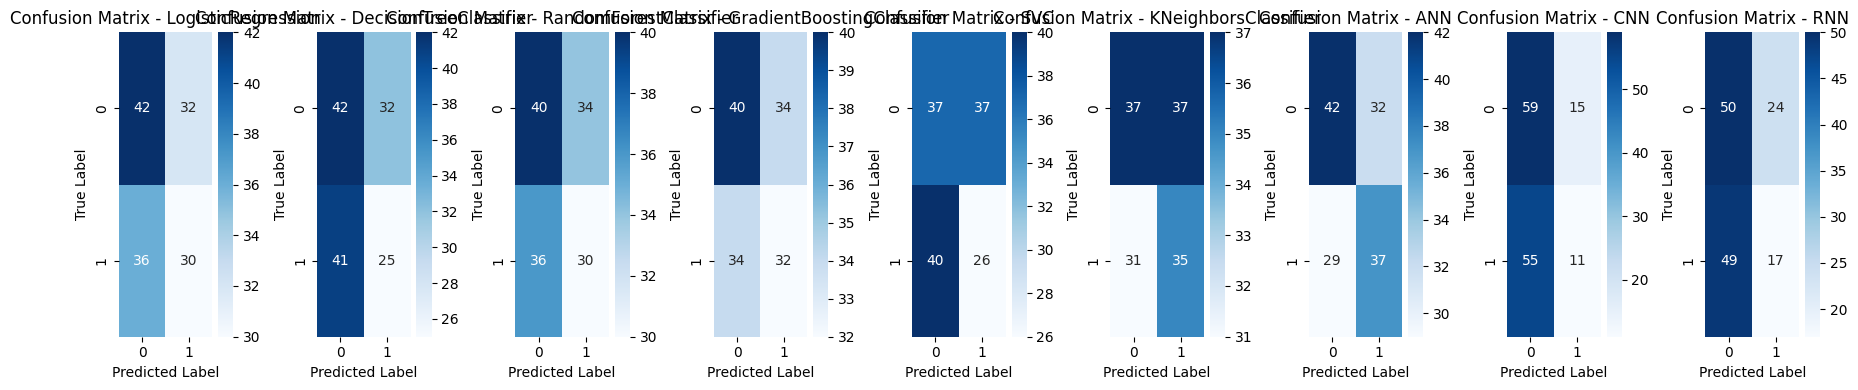

In [43]:
# Function to generate and visualize confusion matrix
def plot_confusion_matrix(model, X_test, y_test, model_name, ax):
    """Plots confusion matrix on a given axis."""

    y_pred_prob = model.predict(X_test)
    if len(y_pred_prob.shape) > 1 and y_pred_prob.shape[1] > 1:  # Check for probabilities
        y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels
    else:
        y_pred = y_pred_prob  # For traditional ML models

    # Convert y_pred to numerical labels if it's strings
    # ---- Modification: Use a mapping instead of LabelEncoder.transform ----
    if isinstance(y_pred[0], str):  # Check if y_pred contains strings
        gender_mapping = {'Male': 0, 'Female': 1}
        y_pred = [gender_mapping[label] for label in y_pred]
    # ---------------------------------------------------------------------

    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax=ax)
    ax.set_title(f'Confusion Matrix - {model_name}')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')


# Create figure and axes
fig, axes = plt.subplots(1, len(classifiers) + 3, figsize=(18, 4))  # Adjust figure size

# Plot confusion matrices for traditional ML models
for i, classifier in enumerate(classifiers):
    plot_confusion_matrix(classifier, X_test, y_test_encoded, classifier.__class__.__name__, axes[i])

# Plot confusion matrices for deep learning models
plot_confusion_matrix(ann_model, X_test, y_test_encoded, "ANN", axes[len(classifiers)])
plot_confusion_matrix(cnn_model, X_test_cnn, y_test_encoded, "CNN", axes[len(classifiers) + 1])
plot_confusion_matrix(rnn_model, X_test_rnn, y_test_encoded, "RNN", axes[len(classifiers) + 2])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# Area Under the Curve (AUC) Of Both ML and DL Models

# AUC (Area Under the Curve)

**Relevance:**

AUC is particularly useful for binary classification problems (like your gender prediction task). It represents the probability that the model will rank a randomly chosen positive instance higher than a randomly chosen negative instance.

**Calculation:**

You can use the roc_auc_score function from sklearn.metrics to calculate AUC.

**Interpretation:**

A higher AUC indicates better model performance, with a value of 1.0 representing perfect classification.

In [45]:
from sklearn.metrics import roc_auc_score

# Function to calculate and print AUC
def calculate_auc(model, X_test, y_test, model_name):
    """Calculates and prints the AUC for a given model."""

    y_pred_prob = model.predict(X_test)  # Get predicted probabilities

    # Handle multi-class or multi-label cases
    if len(y_pred_prob.shape) > 1 and y_pred_prob.shape[1] > 1:
        y_pred_prob = y_pred_prob[:, 1]  # Assuming binary classification (positive class at index 1)

    # Convert string predictions to numerical labels for traditional ML models
    # --- Change: Use a mapping instead of LabelEncoder.transform ---
    if isinstance(y_pred_prob[0], str):  # Check if y_pred contains strings
        gender_mapping = {'Male': 0, 'Female': 1}
        y_pred_prob = [gender_mapping[label] for label in y_pred_prob]
    # ---------------------------------------------------------------

    # Calculate AUC
    auc = roc_auc_score(y_test, y_pred_prob)
    print(f"--- {model_name} ---")
    print(f"AUC: {auc:.4f}")
    print("-" * 20)


# Calculate AUC for traditional ML models
for classifier in classifiers:
    calculate_auc(classifier, X_test, y_test_encoded, classifier.__class__.__name__)

# Calculate AUC for deep learning models
calculate_auc(ann_model, X_test, y_test_encoded, "ANN")
calculate_auc(cnn_model, X_test_cnn, y_test_encoded, "CNN")
calculate_auc(rnn_model, X_test_rnn, y_test_encoded, "RNN")

--- LogisticRegression ---
AUC: 0.5111
--------------------
--- DecisionTreeClassifier ---
AUC: 0.4732
--------------------
--- RandomForestClassifier ---
AUC: 0.4975
--------------------
--- GradientBoostingClassifier ---
AUC: 0.5127
--------------------
--- SVC ---
AUC: 0.4470
--------------------
--- KNeighborsClassifier ---
AUC: 0.5152
--------------------
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
--- ANN ---
AUC: 0.5205
--------------------
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
--- CNN ---
AUC: 0.5190
--------------------
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
--- RNN ---
AUC: 0.4609
--------------------


# ROC of both ML and DL Models
# ROC Curve (Receiver Operating Characteristic Curve)

**Relevance:**

 ROC curves visually illustrate the trade-off between true positive rate (sensitivity) and false positive rate (1-specificity) at various classification thresholds.

**Plotting:**

 You can use the roc_curve function from sklearn.metrics to generate the data points for the ROC curve and then plot them using matplotlib.pyplot.
Interpretation: A curve closer to the top-left corner of the plot indicates better model performance.

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


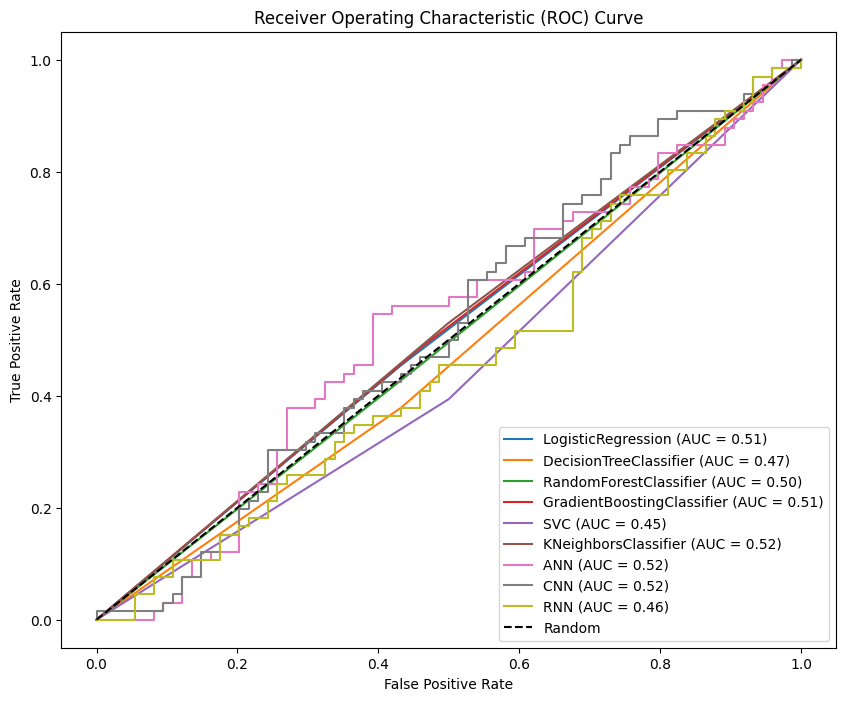

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curve
def plot_roc_curve(model, X_test, y_test, model_name):
    """Plots ROC curve for a given model."""

    y_pred_prob = model.predict(X_test)  # Get predicted probabilities

    # Handle multi-class or multi-label cases
    if len(y_pred_prob.shape) > 1 and y_pred_prob.shape[1] > 1:
        y_pred_prob = y_pred_prob[:, 1]  # Assuming binary classification (positive class at index 1)

    # Convert string predictions to numerical labels for traditional ML models
    # --- Change: Use a mapping instead of LabelEncoder.transform ---
    if isinstance(y_pred_prob[0], str):  # Check if y_pred contains strings
        gender_mapping = {'Male': 0, 'Female': 1}
        y_pred_prob = [gender_mapping[label] for label in y_pred_prob]
    # ---------------------------------------------------------------------


    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')


# Plot ROC curves for all models
plt.figure(figsize=(10, 8))  # Adjust figure size if needed

for classifier in classifiers:
    plot_roc_curve(classifier, X_test, y_test_encoded, classifier.__class__.__name__)

plot_roc_curve(ann_model, X_test, y_test_encoded, "ANN")
plot_roc_curve(cnn_model, X_test_cnn, y_test_encoded, "CNN")
plot_roc_curve(rnn_model, X_test_rnn, y_test_encoded, "RNN")

# Set plot labels and title
plt.plot([0, 1], [0, 1], 'k--', label='Random')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#  Log Loss (Cross-Entropy Loss)

**Relevance:**

 Log loss is commonly used as a loss function during training, but it can also be used as an evaluation metric. It measures the performance of a classification model where the prediction is a probability value between 0 and 1.


**Calculation:** You can use the log_loss function from sklearn.metrics to calculate log loss.


**Interpretation:** A lower log loss indicates better model performance.

In [48]:
from sklearn.metrics import log_loss

# Function to calculate and print Log Loss
def calculate_log_loss(model, X_test, y_test, model_name):
    """Calculates and prints the Log Loss for a given model."""

    y_pred_prob = model.predict(X_test)  # Get predicted probabilities

    # Handle multi-class or multi-label cases
    if len(y_pred_prob.shape) > 1 and y_pred_prob.shape[1] > 1:
        # Assuming binary classification (positive class at index 1) for DL models
        # or multi-class classification with probabilities for ML models
        pass  # No changes needed for these cases
    else:
        # For traditional ML models with single-class predictions,
        # convert to probabilities using predict_proba if available
        try:
            y_pred_prob = model.predict_proba(X_test)
        except AttributeError:
            print(f"Warning: {model_name} does not have predict_proba. Skipping Log Loss calculation.")
            return

    # Convert string predictions to numerical labels for traditional ML models
    if isinstance(y_pred_prob[0], str):  # Check if y_pred contains strings
        y_pred_prob = label_encoder.transform(y_pred_prob) # Use the same LabelEncoder

    # Calculate Log Loss
    loss = log_loss(y_test, y_pred_prob)

    print(f"--- {model_name} ---")
    print(f"Log Loss: {loss:.4f}")
    print("-" * 20)


# Calculate Log Loss for traditional ML models
for classifier in classifiers:
    calculate_log_loss(classifier, X_test, y_test_encoded, classifier.__class__.__name__)

# Calculate Log Loss for deep learning models
calculate_log_loss(ann_model, X_test, y_test_encoded, "ANN")
calculate_log_loss(cnn_model, X_test_cnn, y_test_encoded, "CNN")
calculate_log_loss(rnn_model, X_test_rnn, y_test_encoded, "RNN")

--- LogisticRegression ---
Log Loss: 0.7068
--------------------
--- DecisionTreeClassifier ---
Log Loss: 17.2495
--------------------
--- RandomForestClassifier ---
Log Loss: 0.7229
--------------------
--- GradientBoostingClassifier ---
Log Loss: 0.7616
--------------------
--- KNeighborsClassifier ---
Log Loss: 1.7661
--------------------
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
--- ANN ---
Log Loss: 0.7116
--------------------
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
--- CNN ---
Log Loss: 0.6923
--------------------
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
--- RNN ---
Log Loss: 0.7013
--------------------
